In [1]:
# Libs Necessárias
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [5]:
# Font: https://www.bcb.gov.br/

# Periodo
Mes = ['Nov-2020', 'Dez-2020', 'Jan-2021', 'Fev-2021', 'Mar-2021', 'Abri-2021', 
       'Mai-2021', 'Jun-2021', 'Jul-2021', 'Ago-2021', 'Set-2021', 'Out-2021' ]

# Dados da Inflação
Inflacao = [ 4.31, 4.52, 4.56, 5.20, 6.10, 6.76, 
            8.06, 8.35, 8.99, 9.68, 10.25, 10.67 ]

# Dados Selic
Taxa_Selic = [2.0, 2.0, 2.0, 2.0, 2.75, 2.75, 3.5, 
              4.25, 4.35, 5.25, 6.25, 7.75 ]

# Orgnizando os dados em um Dicionario
Dicionario = {
    'Período' : Mes,
    'Inflação' : Inflacao,
    'Selic' : Taxa_Selic
}

# Lendo o Dicionário em uma Tabela
Analise = pd.DataFrame( Dicionario )

Analise

,Período,Inflação,Selic
0,Nov-2020,4.31,2.00
1,Dez-2020,4.52,2.00
2,Jan-2021,4.56,2.00
3,Fev-2021,5.20,2.00
4,Mar-2021,6.10,2.75
5,Abri-2021,6.76,2.75
6,Mai-2021,8.06,3.50
7,Jun-2021,8.35,4.25
8,Jul-2021,8.99,4.35
9,Ago-2021,9.68,5.25


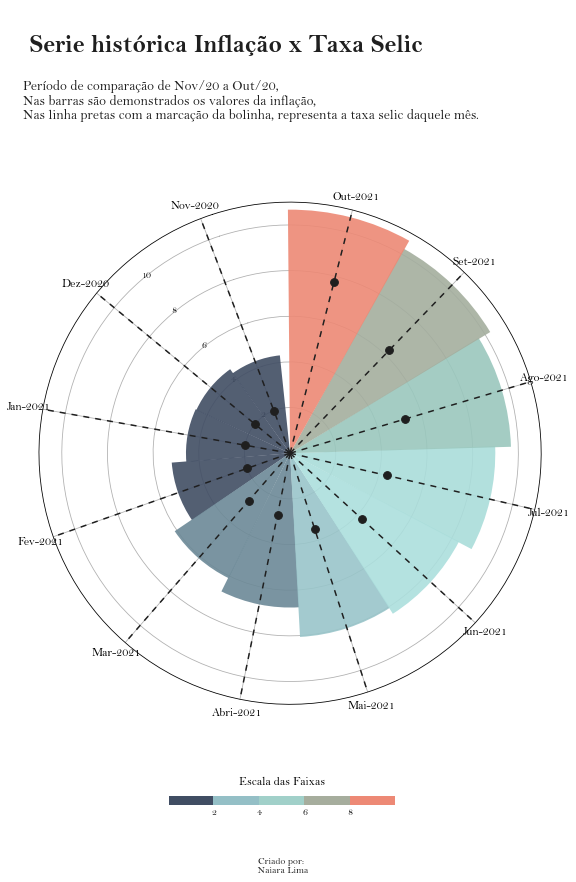

In [7]:
# --------- Parte 1 ---------
# Ajuste dos Dados

# Valores para o eixo x
# Essa função irá retornar um vator para ser utlizado para compor o eixo do gráfico
Valor_Angulo = np.linspace(0.05, 2 * np.pi - 0.05, len(Analise), endpoint=False)

# Valor da Inflação
Valor_Inflacao = Analise['Inflação'].values

# Valor da Selic
Valor_Selic = Analise['Selic'].values

# Periodo para os rotulos
Periodo = Analise['Período'].values

# Numero de registros para compor o gráfico
Numero_Periodos = Analise['Selic'].values



# --------- Parte 2 ---------
# Ajuste do Gráfico

# Cor 
Cinza_Claro = '#1f1f1f'

# Setando a fonte do Gráfico
plt.rcParams.update({'font.family': 'Bell MT'})

# Setando a cor padrão do texto como Cinza_Claro
plt.rcParams['text.color'] = Cinza_Claro

# O glifo negativo não está disponível para fonte 'Bell MT'
# Isso o desativa e usa um hífen
plt.rc('axes', unicode_minus=False)

# Colores para o gráfico
#Paleta_Cores = ['#6C5B7B','#C06C84','#F67280','#F8B195']
Paleta_Cores = ['#404d63','#b2e7e8','#8fb9aa','#ed8975']

# Definindo o Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list('my color', Paleta_Cores, N=256)

# Incluindo o Normalizador
norm = mpl.colors.Normalize(vmin=Numero_Periodos.min(), vmax=Numero_Periodos.max())

# Cores normalizadas. Cada número de trilhas é mapeado para uma cor no
# escala de cores 'cmap'
Paleta_Cores = cmap(norm(Numero_Periodos))



# --------- Parte 3 ---------
# Ajuste final do gráfico

# Inicializar layout em coordenadas polares
fig, ax = plt.subplots( figsize=(9, 12.6), subplot_kw={'projection': 'polar'} )

# Defina a cor de fundo como branco, eixo e figura.
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(0, 11)

# Adicionar geometrias ao gráfico 
# Veja a ordem para manipular quais geometrias estão no topo

# Adicionar barras para representar a faixa cumulativa Valor_Inflacao
ax.bar(Valor_Angulo, Valor_Inflacao, color=Paleta_Cores, alpha=0.9, width=0.52, zorder=10)

# Adicione linhas verticais tracejadas. Estas são apenas referências
ax.vlines(Valor_Angulo, 0, 3000, color=Cinza_Claro, ls=(0, (4, 4)), zorder=11)

# Adicione pontos para representar o ganho médio
ax.scatter(Valor_Angulo, Valor_Selic, s=60, color=Cinza_Claro, zorder=11)

# Defina os rótulos
ax.set_xticks(Valor_Angulo)
ax.set_xticklabels(Periodo, size=12)



# --------- Parte 4 ---------
# Incluindo Legendas

# Abrindo um espaço para a legenda e a legenda na parte inferior.
fig.subplots_adjust(bottom=0.175)

# Crie eixos de inserção.
# A largura e a altura são fornecidas pelo (0,35 e 0,01) no
# bbox_to_anchor
cbaxes = inset_axes(
    ax, 
    width='100%', 
    height='100%', 
    loc='center',
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Observe que ele usa a figura.
) 

# Crie uma nova norma, que seja discreta
bounds = [0, 2, 4, 6, 8, 10]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Criando a barra de cores
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use os inset_axes criados acima
    orientation = 'horizontal',
    ticks=[2, 4, 6, 8]
)

# Remova o contorno da barra de cores
cb.outline.set_visible(False)

# Remova as marcas de escala
cb.ax.xaxis.set_tick_params(size=0)

# Defina o rótulo da legenda e mova-o para o topo (em vez do padrão inferior)
cb.set_label('Escala das Faixas', size=12, labelpad=-40)



# --------- Parte 5 ---------
# Incluindo as notações

# Abra espaço para o título e o subtítulo acima.
fig.subplots_adjust(top=0.8)

# Definindo o Titulo do Texto
Titulo = '\n Serie histórica Inflação x Taxa Selic'

Sub_Titulo = '\n'.join([
    'Período de comparação de Nov/20 a Out/20,',
    'Nas barras são demonstrados os valores da inflação,',
    'Nas linha pretas com a marcação da bolinha, representa a taxa selic daquele mês.'
])

Rodape = 'Criado por: \n Naiara Lima'

# And finally, add them to the plot.
fig.text(0.1, 0.93, Titulo, fontsize=25, weight='bold', ha='left', va='baseline')
fig.text(0.1, 0.9, Sub_Titulo, fontsize=14, ha='left', va='top')
fig.text(0.5, 0.025, Rodape, fontsize=10, ha='center', va='baseline');